In [42]:
%%time
# basic imports
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


CPU times: total: 0 ns
Wall time: 0 ns


In [43]:
df = pd.read_csv('order_data_V2.csv')
df.head()

,order_id,customer_id,product_id,distance,product_rating,date,review,time_taken,place_id,product,product_description,product_type,place_type,place_name,place_address,place_phone_no
0,0,0,3711,46.99,3,6-4-22,0,43,88,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,cafes,Krispy Kreme,"389C Herbert Macaulay Way, Yaba, Lagos, Nigeria",NaN
1,1,665,3206,28.87,4,30-10-22,1,44,55,Chicken Pie,This is another version of meat pie. The difference from the classic one is that the filling is chicken instead of beef. It is loaded with chicken flavor and equally delicious.,snacks,restaurant,Marco-Polo Chinese Restaurant,"9A Karimu Kotun Street, Victoria Island, Lagos, Nigeria","01 270 0248, 01 444 8938"
2,2,315,2717,44.05,5,27-6-22,1,55,19,Spicy Puff Puff,"This is for spicy food lovers. This version is an alternative to the sweet puff puff recipe. It is not so sweet because of its low sugar but spicy, soft, and savory.",snacks,restaurant,China Restaurant And Bar,"26, Metro College, Oshodi Isolo, Lagos, Nigeria",0806 329 5125
3,3,888,3624,10.58,3,15-6-22,0,35,83,Sandwich,"A sandwich is a food typically consisting of vegetables, sliced cheese or meat, placed on or between slices of bread, or more generally any dish wherein bread serves as a container or wrapper for another food type.",snacks,cafes,Fresh Forte,"12E Admiralty Way, Lekki, Lagos, Nigeria",NaN
4,4,332,2315,3.88,3,6-10-22,0,10,61,Grilled Plantains,"Grilled plantain is a street food in Nigeria. A satisfying plantain recipe that is grilled over hot charcoal. All you need is a ripe plantain; no salt or sugar is required. It hits differently when you serve it with groundnut, pepper sauce, or fried egg.",meal,restaurant,PJ Foods,"KM 3 Lasu Iba Road, By First Gate Bus-Stop Agboroko, Ojo, Lagos","0913 427 2579, 0813 368 8523"


In [44]:
menu_df = pd.read_csv('menu_price.csv')
menu_df.head()

,product_id,place_id,product,product_description,product_type,price
0,0,0,Whisky,"While brandy is generally made from grapes, that is, any distilled liquor made from fermented fruit juice is called brandy. Whiskey is made from grain, typically malted barley, corn, or other cereal grains, which is essentially brewed and fermented into beer.",drink,5800
1,1,0,Pineapple Drink,"Made with the normally discarded bits of pineapple – the skin and core, this has a distinct, clear pineapple flavour. Spice with cloves, ginger and other aromatics.",drink,2100
2,2,0,Daiquiri,"If you like your liquor sweetish, then the daiquiri is the way to go. This rum-based cocktail combines a mix of rum, citrus juice (typically lime) and sugar or any other sweetner. It also has other variations like the widely popular strawberry daiquiri.",drink,4300
3,3,0,Beer,"Beer is brewed from cereal grains most commonly from malted barley, however, wheat, corn, and rice are also used.",drink,700
4,4,0,Long Island Iced Tea,"Long island iced tea is made with tequila, vodka, light rum, triple sec, gin and a splash of cola.",drink,3700


In [45]:
print(df.shape)
print(menu_df.shape)

(9024, 16)
(3742, 6)


In [46]:
# Merge df and menu_df
df = df.merge(menu_df, on=['product_id','place_id'], how='left')
df.head(1)

,order_id,customer_id,product_id,distance,product_rating,date,review,time_taken,place_id,product_x,product_description_x,product_type_x,place_type,place_name,place_address,place_phone_no,product_y,product_description_y,product_type_y,price
0,0,0,3711,46.99,3,6-4-22,0,43,88,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,cafes,Krispy Kreme,"389C Herbert Macaulay Way, Yaba, Lagos, Nigeria",NaN,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,700


In [47]:
df.columns

Index(['order_id', 'customer_id', 'product_id', 'distance', 'product_rating',
       'date', 'review', 'time_taken', 'place_id', 'product_x',
       'product_description_x', 'product_type_x', 'place_type', 'place_name',
       'place_address', 'place_phone_no', 'product_y', 'product_description_y',
       'product_type_y', 'price'],
      dtype='object')

In [48]:
#drop irrelevant and duplicate columns
cols_to_drop = ['product_y', 'product_description_y', 'product_type_y']
df.drop(cols_to_drop, axis=1, inplace=True) 

In [49]:
# rename some columns
df = df.rename(columns = {'distance':'distance(km)',
                          'time_taken':'time_taken(min)',
                          'product_type_x':'product_type',
                          'product_x':'product',
                          'product_description_x':'product_description'})
df.head(1)

,order_id,customer_id,product_id,distance(km),product_rating,date,review,time_taken(min),place_id,product,product_description,product_type,place_type,place_name,place_address,place_phone_no,price
0,0,0,3711,46.99,3,6-4-22,0,43,88,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,cafes,Krispy Kreme,"389C Herbert Macaulay Way, Yaba, Lagos, Nigeria",NaN,700


In [50]:
df.shape

(9024, 17)

In [51]:
# Save merged df
df1 = df.to_csv('order_data_pr.csv',index=False)

In [52]:
# read new df
df = pd.read_csv('order_data_pr.csv')
df.head(1)

,order_id,customer_id,product_id,distance(km),product_rating,date,review,time_taken(min),place_id,product,product_description,product_type,place_type,place_name,place_address,place_phone_no,price
0,0,0,3711,46.99,3,6-4-22,0,43,88,Gala,"Gala, a popular on-the-go snack, has become synonymous with convenience and flavor. These savory meat pies consist of a flaky pastry crust filled with a well-seasoned mixture of minced meat, vegetables, and spices.",snacks,cafes,Krispy Kreme,"389C Herbert Macaulay Way, Yaba, Lagos, Nigeria",NaN,700


In [53]:
df['date'] = pd.to_datetime(df['date'])
df['day_of_week'] = df['date'].dt.weekday
df['day_of_week'].head()

0    5
1    6
2    0
3    2
4    4
Name: day_of_week, dtype: int32

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9024 entries, 0 to 9023
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             9024 non-null   int64         
 1   customer_id          9024 non-null   int64         
 2   product_id           9024 non-null   int64         
 3   distance(km)         9024 non-null   float64       
 4   product_rating       9024 non-null   int64         
 5   date                 9024 non-null   datetime64[ns]
 6   review               9024 non-null   int64         
 7   time_taken(min)      9024 non-null   int64         
 8   place_id             9024 non-null   int64         
 9   product              9024 non-null   object        
 10  product_description  9024 non-null   object        
 11  product_type         9024 non-null   object        
 12  place_type           9024 non-null   object        
 13  place_name           9024 non-nul

In [55]:
# Check duplicates
df.duplicated().any()

False

In [56]:
# Check null
df.isna().sum()

order_id                  0
customer_id               0
product_id                0
distance(km)              0
product_rating            0
date                      0
review                    0
time_taken(min)           0
place_id                  0
product                   0
product_description       0
product_type              0
place_type                0
place_name                0
place_address           527
place_phone_no         3540
price                     0
day_of_week               0
dtype: int64

In [57]:
# drop irrelevant  columns
columns = ['place_address', 'place_phone_no']
df.drop(columns=columns, inplace=True)

In [58]:
df.groupby(['place_name','product_type']).agg({'product':'count'})

product
place_name                              product_type         
Abibiz Restaurant                       drink              14
                                        meal               51
                                        snacks             15
Afi's Restaurant                        drink              13
                                        meal               38
                                        snacks             17
Aldente                                 drink              11
                                        meal               34
                                        snacks             20
All Seasons Restaurants                 drink               7
                                        meal               41
                                        snacks             31
Anis Restaurant                         drink               4
                                        meal               39
                                        snacks             34
Appetizers Restaurant                   drink              10
                                        meal               64
                                        snacks             22
Art Cafe                                drink              90
                                        snacks             83
Atlantic Bar & Restaurant               drink              11
                                        meal               40
                                        snacks             20
Ayus Restaurant And Bar                 drink              11
                                        meal               38
                                        snacks             16
Bangkok Restaurant                      drink              17
                                        meal               41
                                        snacks             22
Barcelos                                drink              10
                                        meal               51
                                        snacks             18
Bernadines Cloud Kitchen                drink               6
                                        meal               46
                                        snacks             16
Bourbon House Cafe                      drink              75
                                        snacks             72
Burgy's Fast Food & Restaurant          drink              14
                                        meal               51
                                        snacks             22
Cafe One Yaba                           drink             148
                                        snacks            166
Cal's Place Restaurant                  drink               9
                                        meal               49
                                        snacks             24
Cera-Una-Volta Restaurant               drink               5
                                        meal               61
                                        snacks             12
Chadon Kitchen                          drink              12
                                        meal               58
                                        snacks             17
Chardonnay Restaurant & Bar             drink              14
                                        meal               55
                                        snacks             28
Cheesy Restaurant & Snacks Bar          drink              10
                                        meal               50
                                        snacks             17
Chicken Cooking Family Restaurant       drink              15
                                        meal               57
                                        snacks             23
Chief Delight Restaurant                drink               6
                                        meal               31
                                        snacks             26
China Restaurant And Bar

## EDA

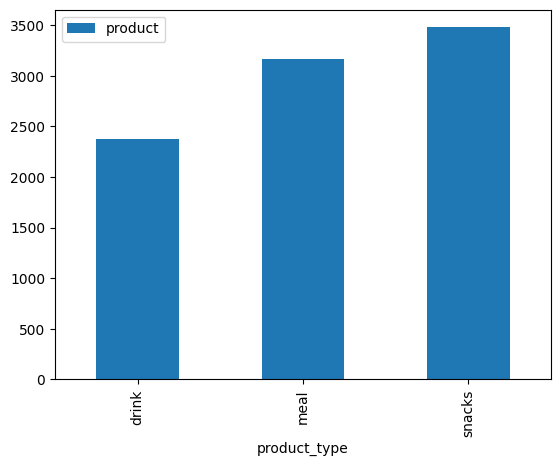

In [59]:
# Check order count of each product
df.groupby('product_type').agg({'product':'count'}).plot(kind='bar');

In [60]:
# Top ten products with highest order
df['product'].value_counts()[:10]

product
Chin Chin                    210
Chicken Shawarma             191
Pound Cake                   182
Meat Pie                     177
Chicken burger               172
Sandwich                     171
Wheat Meat Pie (Beef Pie)    171
Sausage Rolls                171
Chicken Pie                  170
Egg Roll                     169
Name: count, dtype: int64

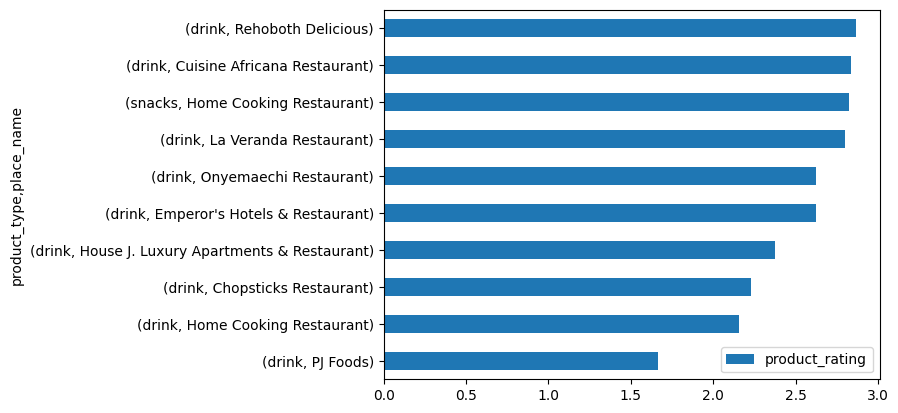

In [61]:
# Top 10 product with highest rating
df_top_pd = df.groupby(['product_type','place_name']).agg({'product_rating':'mean'})
df_top_pd = df_top_pd.sort_values('product_rating')[:10].plot(kind='barh');
#sb.barplot(data=df_top_pd, x='place_name', y='product_rating', hue='product_type');

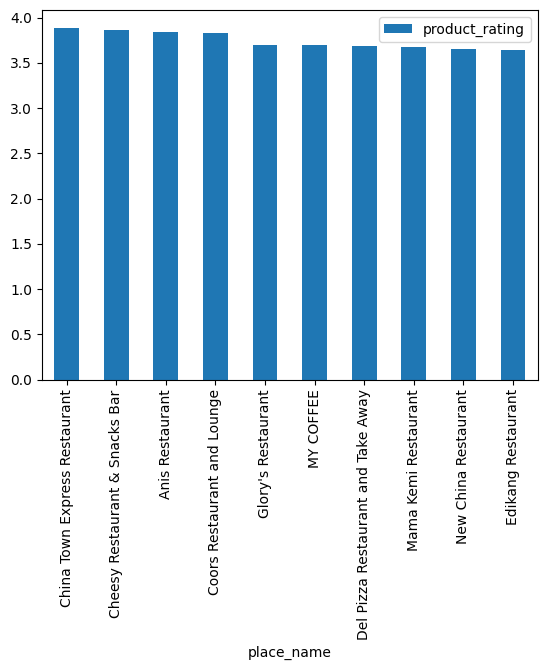

In [62]:
# Top 10 restaurant with highest rating
df.groupby(['place_name']).agg({'product_rating':'mean'}).sort_values('product_rating',ascending=False)[:10].plot(kind='bar');

In [63]:
# Transforming day_of_week
weekday = {0: "Sunday", 1:"Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6:"Saturday"}
df['day_of_week'] = df['day_of_week'].map(weekday)
df['day_of_week'].head()

0      Friday
1    Saturday
2      Sunday
3     Tuesday
4    Thursday
Name: day_of_week, dtype: object

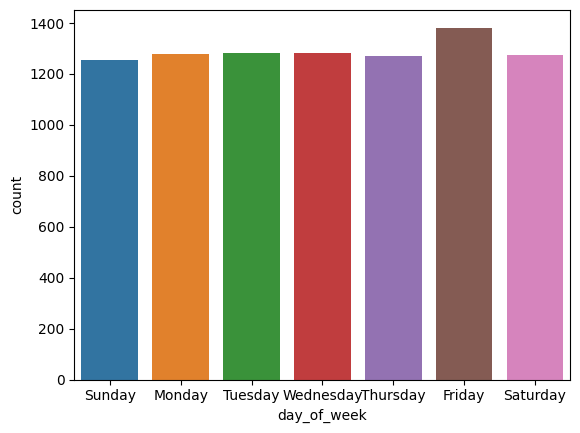

In [64]:
sb.countplot(data=df, x='day_of_week', order=["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]);

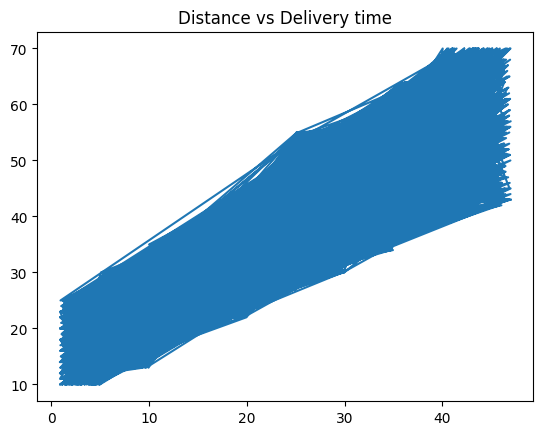

In [65]:
plt.plot(df["distance(km)"], df["time_taken(min)"])
plt.title("Distance vs Delivery time");

## ESTIMATE DELIVERY TIME

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import pickle

In [67]:
# Split Data
X = df['distance(km)'].values.reshape(-1,1)
y = df['time_taken(min)'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [68]:
# Feature Engineering

# ===== Scaler =====
scaler = StandardScaler()

In [69]:
# Transforming train and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [70]:
X_train.shape,y_train.shape

((7219, 1), (7219,))

In [71]:
# Initialize model

RANDOM_STATE = 0
lr = LinearRegression()
rf = RandomForestRegressor(random_state=RANDOM_STATE)
dt = DecisionTreeRegressor(random_state=RANDOM_STATE)

models = {'Linear_Regression':lr, 'RandomForest_Regressor':rf,
        'DecisionTree_Regressor':dt}

# Train models

models_list = []
for name,model in models.items():
    model.fit(X_train,y_train)
    models_list.append(name)

In [72]:
# Evaluating model
accuracy_list, rmse_list = [], []
for name,model in models.items():
    y_pred = model.predict(X_test)
    test_score = model.score(X_test,y_test)
    accuracy_list.append(test_score)
    rmse = mse(y_test,y_pred, squared=False)
    rmse_list.append(rmse)
    print(f"{name} Test Set Accuracy:{test_score} rmse: {rmse}")

Linear_Regression Test Set Accuracy:0.779310527093613 rmse: 6.278553067213242
RandomForest_Regressor Test Set Accuracy:0.7045545695294466 rmse: 7.264527954047122
DecisionTree_Regressor Test Set Accuracy:0.6415897416047636 rmse: 8.00127093240131


The model with the best accuracy is Linear Regression 

In [73]:
for name,model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Predictions:{y_pred[:10]}")

Linear_Regression Predictions:[30.95899968 23.74742175 43.53105532 57.92528774 28.93435882 23.01469458
 30.19734907 27.56531595 38.47909431 16.612973  ]
RandomForest_Regressor Predictions:[28.90452381 18.06956566 40.10730952 65.31633333 25.77258333 20.8969881
 36.20833333 30.07169048 42.56679762 20.21733333]
DecisionTree_Regressor Predictions:[29.         17.8        39.         68.         26.5        21.
 40.         34.         42.66666667 19.        ]


In [74]:
# Saving model with pickle

pickle.dump(lr, open('model.pkl', 'wb'))

In [75]:
#Load the model from Pickle
pickled_model = pickle.load(open('model.pkl', 'rb'))
pickled_model.predict(X_test)

array([30.95899968, 23.74742175, 43.53105532, ..., 40.20485962,
       22.34945544, 21.36605845])

In [76]:
pickled_model.predict(np.array([40]).reshape(-1,1))

array([508.93369736])

## MEAL RECOMMENDATION

In [77]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [78]:
# Computing the vectorisation of product description text fitting and transforming it
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(df['product_description'] + df['product_type'])

In [79]:
# compute the cosine similarity for the computed matrix consisting of product and description
cos_sim = linear_kernel(tfidf_matrix)

In [80]:
# Get product data
sim_pred = df.reset_index()
product_name = df['product'].drop_duplicates()
indices = pd.Series(product_name.index, index=product_name.values)

In [81]:
# function that returns top 10 most similar products based on cosine similarity scores

def product_recommend(user_id):
    # get customers previous order item
    customer_last_order = (df[df["customer_id"] == user_id]["product"]).to_list()[-1]

    # get the similarities based ond the user's last order 
    idx = indices[customer_last_order]
    sim = enumerate(cos_sim[idx])
    sim = sorted(sim, key=lambda x: x[1], reverse=True)

    sim_index = [i[0] for i in sim]
    sim_data = (df["product"].iloc[sim_index]).drop_duplicates()
    
    number = 0
    for i in sim_data[:10].tolist():
       number+=1
       rec_price = df[df['product'] == i][['place_name','product_rating','price']]
       rec_price = rec_price.sort_values('product_rating',ascending=False)[:5]
       place = rec_price['place_name'].tolist()
       price = [str (x) for x in rec_price['price'].tolist()]
       rest_dict = dict(zip(place, price))
       print(f"\n№ {number}")
       print(f"Product: {i}")
       for place, price in rest_dict.items():
           print(f"Place: {place}, Price: {price}")

       
       #print(f"Place: {rest_dict.keys()}")
      
    #return (sim_data[:10]).values.tolist()

In [82]:
product_recommend(user_id=56)



№ 1
Product: Beer
Place: Goat Hunters Restaurant, Price: 3200
Place: MyYa’s Cafe, Price: 2300
Place: Double Four Restaurant & Eatery, Price: 3200
Place: Krispy Kreme, Price: 2300
Place: Art Cafe, Price: 3400

№ 2
Product: Whisky
Place: SEE Lagos, Price: 4100
Place: Cafe One Yaba, Price: 4300
Place: Pause | Café & Espresso Bar, Price: 4900
Place: Stories Lagos, Price: 5100
Place: Ouida Cafe, Price: 5500

№ 3
Product:  Smoothie
Place: Darling - Ro Restaurant, Price: 2000
Place: Cafe One Yaba, Price: 1900
Place: Grey Matter Social Space, Price: 1100
Place: Pause | Café & Espresso Bar, Price: 1500
Place: Ziya Delicacy Boutique, Price: 2300

№ 4
Product: fura da nono
Place: Fresh Forte, Price: 800
Place: Enjoyurmouth.com, Price: 800
Place: Barcelos, Price: 600
Place: La Pointe Cafe, Price: 400
Place: Pause | Café & Espresso Bar, Price: 900

№ 5
Product: Wheat Meat Pie (Beef Pie)
Place: Cafe One Yaba, Price: 700
Place: New China Restaurant, Price: 500
Place: MY COFFEE, Price: 700
Place: Fre